# Data science 101 with COVID-19 dataset

This notebook aims to be a guide to analyze the COVID-19 dataset created by Johns Hopkins University.

In the notebook, you'll have several questions that you should answer using the dataset and the tools taught on the learning unit. Most questions are associated to one of the following topics:
- ***Polygraph*** - you have to confirm if a specific news is fake (or not)! Fake news buuusters
- ***Shooow time*** - sometimes it’s hard to make conclusions from looking at data but visualizations (charts) make it muuuuch easier ;-)
- ***Fortune telling*** - data analysis is really cool but what about predict the future? Isn’it niceeeer? :-D

To do it, we start with colabs notebook setup so we can use Google Colabs with 0-problems.

After the setup, the notebook is splitted in the following units:
- Unit 0 - Load dataset
- Unit 1 - First overview
- Unit 2 - Data Analysis: Worldwide
- Unit 3 - Data Analysis: Country
- Unit 4 - Making predictions

Enjoooy ;)



## File setup

Run the cell below (to do it, click on the cell and then "Shift+Enter" - that's the shortcut you need to run the commands written in a cell).

In [1]:
import sys
path = './'
sys.path.append(path)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
import io

pd.read_csv(io.BytesIO(requests.get('https://hackathon.thorly.education/backend/send-csv',
                                    verify=False).content)).to_csv(path + 'dataset.csv',
                                                                   index=False)

with open("./hackathome.py", "w") as f:
  f.write(requests.get('https://hackathon.thorly.education/backend/send-py').text)                                    

print("Yeeeeaaahhhhh, Great success!")

Yeeeeaaahhhhh, Great success!


**If you don't receive 'Yeeeeaaahhhhh, Great success!', call one of the mentors!**

Otherwise, you're ready to start your challenge. Please, write your code below this text! Good luck!

## Challenge start (11h45)

## Unit 0 - Load dataset (11h45-12h15)

#### **Import libraries**

- 'pandas' to handle data
- 'pyplot' to plot charts

In [0]:
# Code here:
import pandas as pd
from matplotlib import pyplot as plt

#### **Load dataset to a dataframe**

You already have the dataset with the name ***'dataset.csv'*** ready in the folder where this file is ;-)

Load the csv into a Pandas DataFrame

In [0]:
# Read the dataset
df = pd.read_csv('dataset.csv')

## Unit 1. First overview (12h15-13h00)

In this chapter we do the first overview of the dataset and should make it (more) usable for the next steps.

#### **Check the head, tail and shape of the dataset**

In [4]:
# Head, Tail, shape
print('Head')
display(df.head())
print('Tail')
display(df.tail())
print('Shape:', df.shape)

Head


,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0


Tail


,Country/Region,Date (yyyy/mm/dd),Confirmed cases,Death cases,Recovered cases
14240,Yemen,2020-04-03,0,0,0
14241,Yemen,2020-04-04,0,0,0
14242,Yemen,2020-04-05,0,0,0
14243,Yemen,2020-04-06,0,0,0
14244,Yemen,2020-04-07,0,0,0


Shape: (14245, 5)


#### **Q1. What are the columns of the dataset?**

In [5]:
# Code here:
df.columns

Index(['Country/Region', 'Date (yyyy/mm/dd)', 'Confirmed cases', 'Death cases',
       'Recovered cases'],
      dtype='object')

##### **Q1.1. Rename the columns of the dataset to make it easier to work with.**
Use the follow dictionary to rename the columns:
```
{'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
}
```

In [0]:
# Code here:
df = df.rename(columns ={'Country/Region': 'country',
 'Date (yyyy/mm/dd)': 'date',
 'Confirmed cases': 'confirmed',
 'Death cases': 'deaths',
 'Recovered cases': 'recovered'
})

#### **Q2. What is the type of each column of the dataset?**

In [7]:
# Code here:
df.dtypes

country      object
date         object
confirmed     int64
deaths        int64
recovered     int64
dtype: object

##### **Q2.1. Change the type of the 'date' column to datetime.**

In [0]:
# Code here:
df['date'] = pd.to_datetime(df['date'])

#### **Q3. Do we have "nulls" in the dataset?**

In [9]:
# Code here:
df.isnull().sum()

country      0
date         0
confirmed    0
deaths       0
recovered    0
dtype: int64

#### **Q4. How many countries do we have represented in the dataset?**

In [10]:
# Code here:
df.country.nunique()

185

#### **Q5. What is the first and the last 'date' of the dataset?**

In [11]:
# Code here:
print('First date: ', df.date.min())

First date:  2020-01-22 00:00:00


In [12]:
print('Last date: ', df.date.max())

Last date:  2020-04-07 00:00:00


## Unit 2. Data Analysis: Worldwide  (14h00-15h00)

Time to make some worldwide analysis looking at global metrics and comparing countries.

#### **Q6. We checked before that we have data for 'confirmed', 'recovered' and 'deaths' cases but something is missing... Add the column for 'active' cases to the dataset.**

In [0]:
# Code here:
df['active'] = df['confirmed'] - (df['recovered'] + df['deaths'])

#### **Q7. Create a dataset that have the cumulative ACTIVE cases worldwide per day.**

In [14]:
# Code here:
ww_active = df.groupby(['date']).active.sum().reset_index()
ww_active.head()

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


![showtime](https://media.giphy.com/media/13ZVRnWnmSMaRy/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q8. Plot the curve with the evolution of the active cases worlwide.**

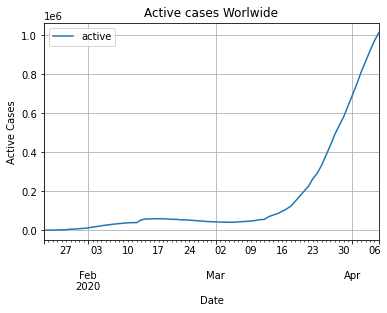

In [15]:
# Code here:
ww_active.plot.line(x='date', y='active',)

plt.title('Active cases Worlwide')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.grid()
plt.show()

#### **Q9. Get the top 10 countries by confirmed cases and plot a bar chart with the top 10 countries with more confirmed cases.**
> **Hint**: You can filter the dataset by the latest day of the dataset (it has the number of confirmed cases in each country). Then sort the values by 'confirmed' and use `head(10)` to get the top 10.

In [16]:
# Code here to get the top 10:
top_10_cont = df[df.date == df.date.max()]\
                  .sort_values(by='confirmed', ascending=False).reset_index(drop=True)\
                  .head(10)
top_10_cont.head()

,country,date,confirmed,deaths,recovered,active
0,US,2020-04-07,396223,12722,21763,361738
1,Spain,2020-04-07,141942,14045,43208,84689
2,Italy,2020-04-07,135586,17127,24392,94067
3,Germany,2020-04-07,107663,2016,36081,69566
4,China,2020-04-07,82718,3335,77410,1973


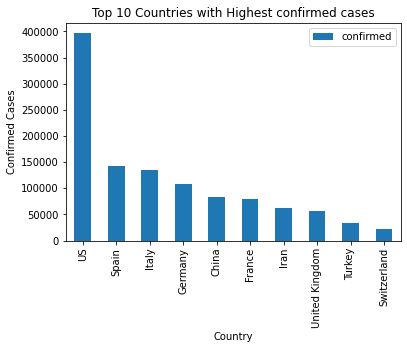

In [17]:
# Code here to plot the bar chart:
top_10_cont.plot.bar(x='country', y='confirmed')

plt.title('Top 10 Countries with Highest confirmed cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()

#### **Q10. Calculate the recovery percentage and mortality rate for each country in latest day**

> **Hint:** Create a dataset with just the last date and create a column for each of the ratios we want:

In [18]:
# Code here:
latest_df = df[df.date == df.date.max()]
latest_df['recov_prec'] = (latest_df['recovered'] * 100) / latest_df['confirmed']
latest_df['mort_rate'] = (latest_df['deaths'] * 100) / latest_df['confirmed']
result = latest_df[['country', 'recov_prec', 'mort_rate']]
result.head()

,country,recov_prec,mort_rate
76,Afghanistan,4.255319,3.309693
153,Albania,34.203655,5.744125
230,Algeria,7.697548,13.147139
307,Andorra,7.155963,4.036697
384,Angola,11.764706,11.764706


![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Netherlands has the highest recovery percentage in the world!*


##### **Q10.1. Is this a fake news?**

In [19]:
# Code here:
display(result.sort_values(by='recov_prec', ascending=False).head(1))
display(result.query("country == 'Netherlands'"))
print('It is a Fake news. China has the highest recovery Percentage')

,country,recov_prec,mort_rate
2540,China,93.583017,4.031771


,country,recov_prec,mort_rate
8238,Netherlands,1.38008,10.695621


It is a Fake news. China has the highest recovery Percentage


## Unit 3. Data analysis - Country (15h00-16h00)

From now on, you will only analyse one country that should be selected from the list below.

For this chapter consider the following values of population (you need the value for your country population to make a further question):

In [0]:
population = {'US': 331002651,
              'Spain': 46754778,
              'Italy': 60461826,
              'Portugal': 10196709,
              'United Kingdom': 67886011,
              'Germany': 83783942,
              'Norway': 5421241,
              'Belgium': 11589623,
              'Netherlands': 17134872,
              'Sweden': 10086360}

### Attention: **The solution is assuming your country is Germany**!

#### **Q11. Get a dataset that contains only information regarding your country.**

In [0]:
# Code here:
country = 'US'

cont_data = df.query(f"country == '{country}'")

#### **Q12. Create a dataset that only contains information since the day that was registered the first case in your country. Tell us what is that day and how many cases were registered in that day?**

In [112]:
# Code here:
contdata= cont_data.query("confirmed > 0").reset_index(drop=True).sort_values(by='date', ascending=True)
print("The first day was:", contdata.date[0].date())
print("The Number of cases registered on this day were:", contdata.confirmed[0])

The first day was: 2020-01-22
The Number of cases registered on this day were: 1


#### **Q13. Get a column with the confirmed cases in proportion to 1M of the population.**

In [113]:
# Code here:
contdata['proportion'] = contdata['confirmed'] * 1000000 / population.get(country)
contdata.head()

,country,date,confirmed,deaths,recovered,active,proportion
0,US,2020-01-22,1,0,0,1,0.003021
1,US,2020-01-23,1,0,0,1,0.003021
2,US,2020-01-24,2,0,0,2,0.006042
3,US,2020-01-25,2,0,0,2,0.006042
4,US,2020-01-26,5,0,0,5,0.015106


#### **Q14. Get a column that register the number of days since the first case was registered per country.**

In [114]:
# Code here:
contdata['days'] = contdata.index + 1
contdata.head()

,country,date,confirmed,deaths,recovered,active,proportion,days
0,US,2020-01-22,1,0,0,1,0.003021,1
1,US,2020-01-23,1,0,0,1,0.003021,2
2,US,2020-01-24,2,0,0,2,0.006042,3
3,US,2020-01-25,2,0,0,2,0.006042,4
4,US,2020-01-26,5,0,0,5,0.015106,5


![showtime](https://media.giphy.com/media/fxqt51CAMGITJlxcRI/giphy.gif)

***IT'S SHOOOOOOW TIME***

#### **Q15. Plot the cruve with evolution of confirmed cases per 1M of population since the 1st case for your country**

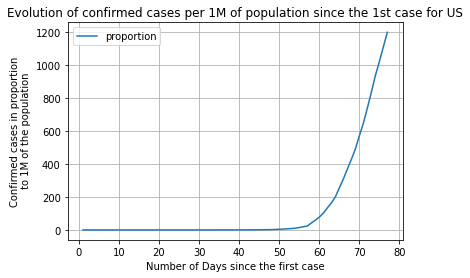

In [115]:
# Code here:

contdata.plot.line(x='days', y='proportion')
plt.title(f'Evolution of confirmed cases per 1M of population since the 1st case for {country}')
plt.xlabel('Number of Days since the first case')
plt.ylabel('Confirmed cases in proportion\n to 1M of the population')
plt.grid()
plt.show()

#### **Q16. How does your country compares in terms of confirmed cases to others?**

Just run the code below and analyze the chart. Compare your country with others.

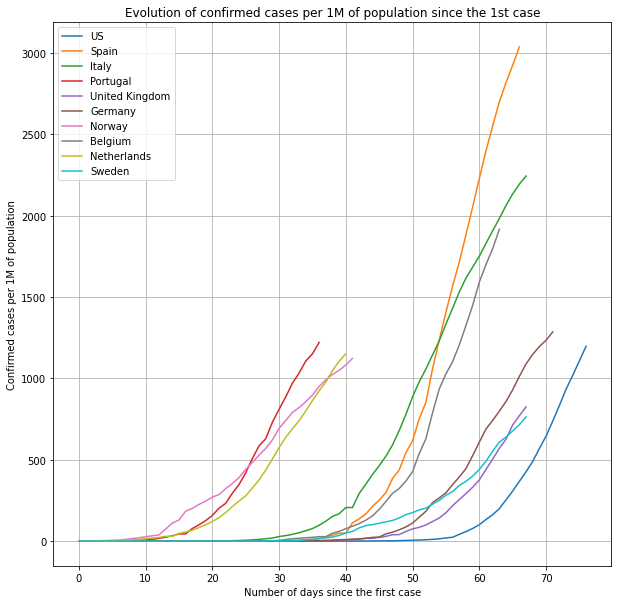

In [116]:
# Run this cell:
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

population_plot = {'US': 331002651,'Spain': 46754778,'Italy': 60461826,'Portugal': 10196709,
                   'United Kingdom': 67886011,'Germany': 83783942,'Norway': 5421241,
                   'Belgium': 11589623,'Netherlands': 17134872,'Sweden': 10086360}

df_thorly = pd.read_csv('./dataset.csv')
df_thorly['Date (yyyy/mm/dd)'] = pd.to_datetime(df_thorly['Date (yyyy/mm/dd)'])
plt.figure(figsize=(10,10))

for country in population:
  country_df = df_thorly[df_thorly['Country/Region'] == country]
  country_df = country_df[country_df['Confirmed cases'] > 0]
  country_df['confirmed_pop'] = ((country_df['Confirmed cases'] / population_plot[country]) * 1000000)
  country_df['days'] = (country_df['Date (yyyy/mm/dd)'] - country_df['Date (yyyy/mm/dd)'].min()).dt.days

  plt.plot(country_df.days, country_df.confirmed_pop, label = country)

plt.legend()
plt.grid()
plt.xlabel('Number of days since the first case')
plt.ylabel('Confirmed cases per 1M of population')
plt.title('Evolution of confirmed cases per 1M of population since the 1st case')
plt.show()

![](https://media.giphy.com/media/rbaC8w0QY1vGw/giphy.gif)

##### **POLYGRAPH TIME!!!**

> ***BREAKING NEWS:***
> 
> *Norway is one of the fastest countries to reach more cases by 1M population since the first case confirmation in the country!*


##### **Q16.1. Is this a fake news?**

*(There is no need to code in this question... Analyze the chart above)*

In [117]:
print("No, It's the truth")

No, It's the truth


## Unit 4. Making predictions (16h30-17h30)
Here we will deal with models definition and we should be able to make predictions. There are a lot of models that can be used but we prefer to keep things simple for now... Use the models we explained in the learning unit.

![prediction](https://media.giphy.com/media/3o72F5tx9CEhSDxonC/giphy.gif)

#### Time to **fortune telling**!!!

In [0]:
# Code here:
from hackathome import Exponential, Logistic, Gompertz

# Instatiate a model
model_1 = Exponential()
model_2 = Logistic()
model_3 = Gompertz()

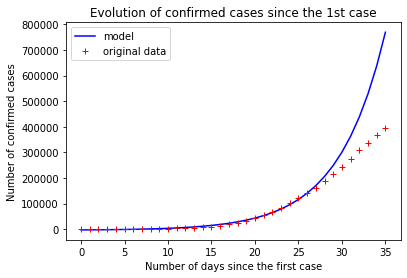

In [119]:
# EXPONENTIAL MODEL
# Select country and set parameters
country_df = model_1.select_country(contdata, 'US', after_confirmation_cases=100)

# Fit the model to the data (pair points of x and y)
model_1.fit(country_df['days'][:-8], country_df['confirmed'][:-8])


# Making predictions for tne next ‘x’ days
pred_1 = model_1.predict(8)

# Visualize model’s behaviour (with or without predictions) 
model_1.visualize_curve(country_df, predictions=True)

In [120]:
# Calculate Average Square Error
model_1_df = country_df[-8:].merge(pred_1[-8:].rename(columns={'confirmed':'predicted'}), how= 'left', on=['days'])
model_1_df['ss_error'] = (model_1_df['confirmed'] - model_1_df['predicted'])**2
avg_sq_error_1 = model_1_df['ss_error'].sum() / model_1_df.shape[0]
avg_sq_error_1

34828310676.05052

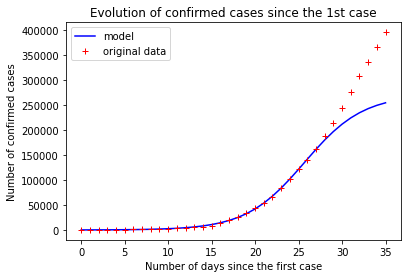

In [121]:
# LOGISTIC MODEL
# Select country and set parameters
country_df = model_2.select_country(contdata, 'US', after_confirmation_cases=100)

# Fit the model to the data (pair points of x and y)
model_2.fit(country_df['days'][:-8], country_df['confirmed'][:-8])

# Making predictions for tne next ‘x’ days
pred_2 = model_2.predict(8)

# Visualize model’s behaviour (with or without predictions) 
model_2.visualize_curve(country_df, predictions=True)

In [122]:
# Calculate Average Square Error
model_2_df = country_df[-8:].merge(pred_2[-8:].rename(columns={'confirmed':'predicted'}), how= 'left', on=['days'])
model_2_df['ss_error'] = (model_2_df['confirmed'] - model_2_df['predicted'])**2
avg_sq_error_2 = model_2_df['ss_error'].sum() / model_2_df.shape[0]
avg_sq_error_2

6505614793.363041

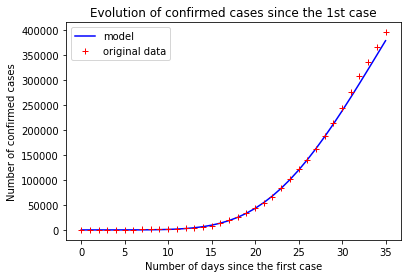

In [123]:
# GOMPERTZ MODEL
# Select country and set parameters
country_df = model_3.select_country(contdata, 'US', after_confirmation_cases=100)

# Fit the model to the data (pair points of x and y)
model_3.fit(country_df['days'][:-8], country_df['confirmed'][:-8])

# Making predictions for tne next ‘x’ days
pred_3 = model_3.predict(8)

# Visualize model’s behaviour (with or without predictions) 
model_3.visualize_curve(country_df, predictions=True)

In [124]:
# Calculate Average Square Error
model_3_df = country_df[-8:].merge(pred_3[-8:].rename(columns={'confirmed':'predicted'}), how= 'left', on=['days'])
model_3_df['ss_error'] = (model_3_df['confirmed'] - model_3_df['predicted'])**2
avg_sq_error_3 = model_3_df['ss_error'].sum() / model_3_df.shape[0]
avg_sq_error_3

143545921.788993

In [139]:
model_errors = {'Exponential':avg_sq_error_1, 
                'Logistic': avg_sq_error_2, 
                'Gompertz': avg_sq_error_3}
key_min = min(model_errors.keys(), key=(lambda k: model_errors[k]))
print(f'The best Model is: {key_min}')

The best Model is: Gompertz


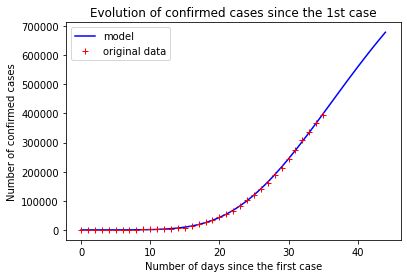

In [126]:
# As we can see that Gompertz is the best Model for US. So, we will predict next 9 days using this model.

# GOMPERTZ MODEL
# Select country and set parameters
country_df = model_3.select_country(contdata, 'US', after_confirmation_cases=100)

# Fit the model to the data (pair points of x and y)
model_3.fit(country_df['days'], country_df['confirmed'])

# Making predictions for tne next ‘x’ days
pred_3 = model_3.predict(9)

# Visualize model’s behaviour (with or without predictions) 
model_3.visualize_curve(country_df, predictions=True)

Then, to create the prediction file:

In [0]:
# Code here:
# Prepare the output file
output = pred_3.merge(country_df[['country', 'date', 'days']], how='outer', on=['days'], indicator=True)
import datetime

# Add date to the predicted values and country
for i in range(len(output)):
  if output['date'][i] == output['date'].max():
    j=i+1
    output['date'][j] = output['date'][i] + datetime.timedelta(days=1)
    output['country'][j] = output['country'][i]

out_final = output.query("_merge=='left_only'")[['country', 'date', 'confirmed']]

In [128]:
# round up the predicted values to zero decimal level
out_final['confirmed'] = out_final['confirmed'].round().astype('int64')
out_final

,country,date,confirmed
36,US,2020-04-08,431591
37,US,2020-04-09,464008
38,US,2020-04-10,496272
39,US,2020-04-11,528223
40,US,2020-04-12,559717
41,US,2020-04-13,590626
42,US,2020-04-14,620841
43,US,2020-04-15,650268
44,US,2020-04-16,678827


In [0]:
out_final.to_csv('US_pred_team_6.csv', index=False)

**Now you can get your file by opening the left pane and download it by click on mouse left button. After that, upload the file to the leaderboard using the instructions in the platform!**

## Finish challenge (17h30)

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)

**Congratulations, you've been through an entire simple data science project.**

Now it's time to do the quizzzz! After it, you should finish your presentations!
